In [2]:
!pip install pandas nltk bnlp-toolkit indic-nlp-library
!pip install googletrans==4.0.0-rc1

  Using cached gensim-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.3 kB)
  Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached gensim-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.1 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.1
    Uninstalling gensim-4.3.1:
      Successfully uninstalled gensim-4.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cvxpy 1.6.6 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but

In [3]:
pip install numpy==1.24.4 pandas==1.5.3 scipy==1.11.4 gensim==4.3.1

  Using cached scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached gensim-4.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.4 kB)
Using cached scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)
Using cached gensim-4.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.2
    Uninstalling gensim-4.3.2:
      Successfully uninstalled gensim-4.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bnlp-toolkit 4.0.3 requires gensim==4.3.2, but you have gensim 4.3.1 which is incompatible.
bnlp-toolkit 4.0.3 requires sci

In [4]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from bnlp import BasicTokenizer
from indicnlp.normalize.indic_normalize import IndicNormalizerFactory
from indicnlp.tokenize import indic_tokenize
from googletrans import Translator
from collections import Counter
nltk.download('stopwords')

punkt not found. downloading...


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
df = pd.read_excel('/content/sample_data/bangla_online_comments_dataset.xlsx')
df

,comment,Category,Gender,comment react number,label
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1.0,sexual
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully
3,ক্যাপ্টেন অফ বাংলাদেশ,Sports,Male,0.0,not bully
4,পটকা মাছ,Politician,Male,0.0,troll
...,...,...,...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",Social,Male,0.0,not bully
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,Social,Male,1.0,not bully
43998,হিরো ভাই তুমি এগিয়ে য়াও,Social,Male,0.0,not bully
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,Actor,Female,1.0,not bully


In [6]:
df['label'].unique()

array(['sexual', 'not bully', 'troll', 'religious', 'threat'],
      dtype=object)

In [7]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove links
    text = re.sub(r'[^\u0980-\u09FFA-Za-z\s]', '', text) # keep only Bangla + English characters
    text = re.sub(r'\d+', '', text)                      # remove digits
    text = re.sub(r'\s+', ' ', text).strip()             # remove extra spaces
    return text

df['clean_comment'] = df['comment'].apply(clean_text)

df

,comment,Category,Gender,comment react number,label,clean_comment
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1.0,sexual,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully,ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully,অরে বাবা এই টা কোন পাগল
3,ক্যাপ্টেন অফ বাংলাদেশ,Sports,Male,0.0,not bully,ক্যাপ্টেন অফ বাংলাদেশ
4,পটকা মাছ,Politician,Male,0.0,troll,পটকা মাছ
...,...,...,...,...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",Social,Male,0.0,not bully,হিরো আলম এগিয়ে যাও
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,Social,Male,1.0,not bully,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...
43998,হিরো ভাই তুমি এগিয়ে য়াও,Social,Male,0.0,not bully,হিরো ভাই তুমি এগিয়ে য়াও
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,Actor,Female,1.0,not bully,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি


In [8]:
df['tokens'] = df['clean_comment'].apply(lambda x: x.split())

tokenizer = BasicTokenizer()

df['tokens'] = df['clean_comment'].apply(lambda x: tokenizer.tokenize(x))

df

,comment,Category,Gender,comment react number,label,clean_comment,tokens
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1.0,sexual,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,"[ওই, হালার, পুত, এখন, কি, মদ, খাওয়ার, সময়, র..."
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully,ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন,"[ঘরে, বসে, শুট, করতে, কেমন, লেগেছে, ক্যামেরাতে..."
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully,অরে বাবা এই টা কোন পাগল,"[অরে, বাবা, এই, টা, কোন, পাগল]"
3,ক্যাপ্টেন অফ বাংলাদেশ,Sports,Male,0.0,not bully,ক্যাপ্টেন অফ বাংলাদেশ,"[ক্যাপ্টেন, অফ, বাংলাদেশ]"
4,পটকা মাছ,Politician,Male,0.0,troll,পটকা মাছ,"[পটকা, মাছ]"
...,...,...,...,...,...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",Social,Male,0.0,not bully,হিরো আলম এগিয়ে যাও,"[হিরো, আলম, এগিয়ে, যাও]"
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,Social,Male,1.0,not bully,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,"[হিরো, আলমকে, সাপোর্ট, দেওয়ার, জন্য, অসংখ্য, ..."
43998,হিরো ভাই তুমি এগিয়ে য়াও,Social,Male,0.0,not bully,হিরো ভাই তুমি এগিয়ে য়াও,"[হিরো, ভাই, তুমি, এগিয়ে, য়াও]"
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,Actor,Female,1.0,not bully,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,"[হুম, ভাও, তোমরা, এগিয়ে, যাও, আমরা, তোমাদের, প..."


In [9]:
# Download stopwords list manually
!wget https://raw.githubusercontent.com/stopwords-iso/stopwords-bn/master/stopwords-bn.txt

# Read stopwords into a list
with open('stopwords-bn.txt', 'r', encoding='utf-8') as f:
    stopwords_bn = set(f.read().splitlines())

# English stopwords from nltk
from nltk.corpus import stopwords
stopwords_en = set(stopwords.words('english'))

# Combine both lists
all_stopwords = stopwords_en.union(stopwords_bn)

# Function to remove stopwords
def remove_stopwords(tokens):
    return [token for token in tokens if token not in all_stopwords]

# Apply
df['tokens_filtered'] = df['tokens'].apply(remove_stopwords)

df

--2025-06-19 12:09:19--  https://raw.githubusercontent.com/stopwords-iso/stopwords-bn/master/stopwords-bn.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5443 (5.3K) [text/plain]
Saving to: ‘stopwords-bn.txt.3’

stopwords-bn.txt.3  100%[===================>]   5.32K  --.-KB/s    in 0s      

2025-06-19 12:09:20 (75.5 MB/s) - ‘stopwords-bn.txt.3’ saved [5443/5443]



,comment,Category,Gender,comment react number,label,clean_comment,tokens,tokens_filtered
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1.0,sexual,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,"[ওই, হালার, পুত, এখন, কি, মদ, খাওয়ার, সময়, র...","[হালার, পুত, মদ, খাওয়ার, সময়, রাতের, বেলা, ম..."
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully,ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন,"[ঘরে, বসে, শুট, করতে, কেমন, লেগেছে, ক্যামেরাতে...","[ঘরে, শুট, কেমন, লেগেছে, ক্যামেরাতে]"
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully,অরে বাবা এই টা কোন পাগল,"[অরে, বাবা, এই, টা, কোন, পাগল]","[অরে, বাবা, টা, পাগল]"
3,ক্যাপ্টেন অফ বাংলাদেশ,Sports,Male,0.0,not bully,ক্যাপ্টেন অফ বাংলাদেশ,"[ক্যাপ্টেন, অফ, বাংলাদেশ]","[ক্যাপ্টেন, অফ, বাংলাদেশ]"
4,পটকা মাছ,Politician,Male,0.0,troll,পটকা মাছ,"[পটকা, মাছ]","[পটকা, মাছ]"
...,...,...,...,...,...,...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",Social,Male,0.0,not bully,হিরো আলম এগিয়ে যাও,"[হিরো, আলম, এগিয়ে, যাও]","[হিরো, আলম, এগিয়ে, যাও]"
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,Social,Male,1.0,not bully,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,"[হিরো, আলমকে, সাপোর্ট, দেওয়ার, জন্য, অসংখ্য, ...","[হিরো, আলমকে, সাপোর্ট, অসংখ্য, ধন্যবাদ, আপনাকে]"
43998,হিরো ভাই তুমি এগিয়ে য়াও,Social,Male,0.0,not bully,হিরো ভাই তুমি এগিয়ে য়াও,"[হিরো, ভাই, তুমি, এগিয়ে, য়াও]","[হিরো, ভাই, এগিয়ে, য়াও]"
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,Actor,Female,1.0,not bully,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,"[হুম, ভাও, তোমরা, এগিয়ে, যাও, আমরা, তোমাদের, প...","[হুম, ভাও, তোমরা, এগিয়ে, যাও, তোমাদের, পিছনে, ..."


In [10]:
from googletrans import Translator

translator = Translator()

def is_english_word(word):
    return re.match(r'^[A-Za-z]+$', word)

def translate_mixed_tokens(tokens):
    translated_tokens = []
    for word in tokens:
        if is_english_word(word):
            try:
                translated_word = translator.translate(word, src='en', dest='bn').text
            except:
                translated_word = word
            translated_tokens.append(translated_word)
        else:
            translated_tokens.append(word)
    return ' '.join(translated_tokens)

In [11]:
df['translated_comment'] = df['tokens_filtered'].apply(translate_mixed_tokens)

In [12]:
df

,comment,Category,Gender,comment react number,label,clean_comment,tokens,tokens_filtered,translated_comment
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1.0,sexual,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,"[ওই, হালার, পুত, এখন, কি, মদ, খাওয়ার, সময়, র...","[হালার, পুত, মদ, খাওয়ার, সময়, রাতের, বেলা, ম...",হালার পুত মদ খাওয়ার সময় রাতের বেলা মদ খাই দি...
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully,ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন,"[ঘরে, বসে, শুট, করতে, কেমন, লেগেছে, ক্যামেরাতে...","[ঘরে, শুট, কেমন, লেগেছে, ক্যামেরাতে]",ঘরে শুট কেমন লেগেছে ক্যামেরাতে
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully,অরে বাবা এই টা কোন পাগল,"[অরে, বাবা, এই, টা, কোন, পাগল]","[অরে, বাবা, টা, পাগল]",অরে বাবা টা পাগল
3,ক্যাপ্টেন অফ বাংলাদেশ,Sports,Male,0.0,not bully,ক্যাপ্টেন অফ বাংলাদেশ,"[ক্যাপ্টেন, অফ, বাংলাদেশ]","[ক্যাপ্টেন, অফ, বাংলাদেশ]",ক্যাপ্টেন অফ বাংলাদেশ
4,পটকা মাছ,Politician,Male,0.0,troll,পটকা মাছ,"[পটকা, মাছ]","[পটকা, মাছ]",পটকা মাছ
...,...,...,...,...,...,...,...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",Social,Male,0.0,not bully,হিরো আলম এগিয়ে যাও,"[হিরো, আলম, এগিয়ে, যাও]","[হিরো, আলম, এগিয়ে, যাও]",হিরো আলম এগিয়ে যাও
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,Social,Male,1.0,not bully,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,"[হিরো, আলমকে, সাপোর্ট, দেওয়ার, জন্য, অসংখ্য, ...","[হিরো, আলমকে, সাপোর্ট, অসংখ্য, ধন্যবাদ, আপনাকে]",হিরো আলমকে সাপোর্ট অসংখ্য ধন্যবাদ আপনাকে
43998,হিরো ভাই তুমি এগিয়ে য়াও,Social,Male,0.0,not bully,হিরো ভাই তুমি এগিয়ে য়াও,"[হিরো, ভাই, তুমি, এগিয়ে, য়াও]","[হিরো, ভাই, এগিয়ে, য়াও]",হিরো ভাই এগিয়ে য়াও
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,Actor,Female,1.0,not bully,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,"[হুম, ভাও, তোমরা, এগিয়ে, যাও, আমরা, তোমাদের, প...","[হুম, ভাও, তোমরা, এগিয়ে, যাও, তোমাদের, পিছনে, ...",হুম ভাও তোমরা এগিয়ে যাও তোমাদের পিছনে আছি


In [13]:
df['translated_comment_tokens'] = df['translated_comment'].apply(lambda x: x.split())

tokenizer = BasicTokenizer()

df['translated_comment_tokens'] = df['translated_comment'].apply(lambda x: tokenizer.tokenize(x))

df

,comment,Category,Gender,comment react number,label,clean_comment,tokens,tokens_filtered,translated_comment,translated_comment_tokens
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1.0,sexual,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,"[ওই, হালার, পুত, এখন, কি, মদ, খাওয়ার, সময়, র...","[হালার, পুত, মদ, খাওয়ার, সময়, রাতের, বেলা, ম...",হালার পুত মদ খাওয়ার সময় রাতের বেলা মদ খাই দি...,"[হালার, পুত, মদ, খাওয়ার, সময়, রাতের, বেলা, ম..."
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully,ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন,"[ঘরে, বসে, শুট, করতে, কেমন, লেগেছে, ক্যামেরাতে...","[ঘরে, শুট, কেমন, লেগেছে, ক্যামেরাতে]",ঘরে শুট কেমন লেগেছে ক্যামেরাতে,"[ঘরে, শুট, কেমন, লেগেছে, ক্যামেরাতে]"
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully,অরে বাবা এই টা কোন পাগল,"[অরে, বাবা, এই, টা, কোন, পাগল]","[অরে, বাবা, টা, পাগল]",অরে বাবা টা পাগল,"[অরে, বাবা, টা, পাগল]"
3,ক্যাপ্টেন অফ বাংলাদেশ,Sports,Male,0.0,not bully,ক্যাপ্টেন অফ বাংলাদেশ,"[ক্যাপ্টেন, অফ, বাংলাদেশ]","[ক্যাপ্টেন, অফ, বাংলাদেশ]",ক্যাপ্টেন অফ বাংলাদেশ,"[ক্যাপ্টেন, অফ, বাংলাদেশ]"
4,পটকা মাছ,Politician,Male,0.0,troll,পটকা মাছ,"[পটকা, মাছ]","[পটকা, মাছ]",পটকা মাছ,"[পটকা, মাছ]"
...,...,...,...,...,...,...,...,...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",Social,Male,0.0,not bully,হিরো আলম এগিয়ে যাও,"[হিরো, আলম, এগিয়ে, যাও]","[হিরো, আলম, এগিয়ে, যাও]",হিরো আলম এগিয়ে যাও,"[হিরো, আলম, এগিয়ে, যাও]"
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,Social,Male,1.0,not bully,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,"[হিরো, আলমকে, সাপোর্ট, দেওয়ার, জন্য, অসংখ্য, ...","[হিরো, আলমকে, সাপোর্ট, অসংখ্য, ধন্যবাদ, আপনাকে]",হিরো আলমকে সাপোর্ট অসংখ্য ধন্যবাদ আপনাকে,"[হিরো, আলমকে, সাপোর্ট, অসংখ্য, ধন্যবাদ, আপনাকে]"
43998,হিরো ভাই তুমি এগিয়ে য়াও,Social,Male,0.0,not bully,হিরো ভাই তুমি এগিয়ে য়াও,"[হিরো, ভাই, তুমি, এগিয়ে, য়াও]","[হিরো, ভাই, এগিয়ে, য়াও]",হিরো ভাই এগিয়ে য়াও,"[হিরো, ভাই, এগিয়ে, য়াও]"
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,Actor,Female,1.0,not bully,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,"[হুম, ভাও, তোমরা, এগিয়ে, যাও, আমরা, তোমাদের, প...","[হুম, ভাও, তোমরা, এগিয়ে, যাও, তোমাদের, পিছনে, ...",হুম ভাও তোমরা এগিয়ে যাও তোমাদের পিছনে আছি,"[হুম, ভাও, তোমরা, এগিয়ে, যাও, তোমাদের, পিছনে, ..."


In [14]:
# Download stopwords list manually
!wget https://raw.githubusercontent.com/stopwords-iso/stopwords-bn/master/stopwords-bn.txt

# Read stopwords into a list
with open('stopwords-bn.txt', 'r', encoding='utf-8') as f:
    stopwords_bn = set(f.read().splitlines())

# English stopwords from nltk
from nltk.corpus import stopwords
stopwords_en = set(stopwords.words('english'))

# Combine both lists
all_stopwords = stopwords_en.union(stopwords_bn)

# Function to remove stopwords
def remove_stopwords(tokens):
    return [token for token in tokens if token not in all_stopwords]

# Apply
df['translated_comment_tokens_filtered'] = df['translated_comment_tokens'].apply(remove_stopwords)

df

--2025-06-19 12:53:07--  https://raw.githubusercontent.com/stopwords-iso/stopwords-bn/master/stopwords-bn.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5443 (5.3K) [text/plain]
Saving to: ‘stopwords-bn.txt.4’

stopwords-bn.txt.4  100%[===================>]   5.32K  --.-KB/s    in 0s      

2025-06-19 12:53:07 (67.9 MB/s) - ‘stopwords-bn.txt.4’ saved [5443/5443]



,comment,Category,Gender,comment react number,label,clean_comment,tokens,tokens_filtered,translated_comment,translated_comment_tokens,translated_comment_tokens_filtered
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1.0,sexual,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,"[ওই, হালার, পুত, এখন, কি, মদ, খাওয়ার, সময়, র...","[হালার, পুত, মদ, খাওয়ার, সময়, রাতের, বেলা, ম...",হালার পুত মদ খাওয়ার সময় রাতের বেলা মদ খাই দি...,"[হালার, পুত, মদ, খাওয়ার, সময়, রাতের, বেলা, ম...","[হালার, পুত, মদ, খাওয়ার, সময়, রাতের, বেলা, ম..."
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully,ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন,"[ঘরে, বসে, শুট, করতে, কেমন, লেগেছে, ক্যামেরাতে...","[ঘরে, শুট, কেমন, লেগেছে, ক্যামেরাতে]",ঘরে শুট কেমন লেগেছে ক্যামেরাতে,"[ঘরে, শুট, কেমন, লেগেছে, ক্যামেরাতে]","[ঘরে, শুট, কেমন, লেগেছে, ক্যামেরাতে]"
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully,অরে বাবা এই টা কোন পাগল,"[অরে, বাবা, এই, টা, কোন, পাগল]","[অরে, বাবা, টা, পাগল]",অরে বাবা টা পাগল,"[অরে, বাবা, টা, পাগল]","[অরে, বাবা, টা, পাগল]"
3,ক্যাপ্টেন অফ বাংলাদেশ,Sports,Male,0.0,not bully,ক্যাপ্টেন অফ বাংলাদেশ,"[ক্যাপ্টেন, অফ, বাংলাদেশ]","[ক্যাপ্টেন, অফ, বাংলাদেশ]",ক্যাপ্টেন অফ বাংলাদেশ,"[ক্যাপ্টেন, অফ, বাংলাদেশ]","[ক্যাপ্টেন, অফ, বাংলাদেশ]"
4,পটকা মাছ,Politician,Male,0.0,troll,পটকা মাছ,"[পটকা, মাছ]","[পটকা, মাছ]",পটকা মাছ,"[পটকা, মাছ]","[পটকা, মাছ]"
...,...,...,...,...,...,...,...,...,...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",Social,Male,0.0,not bully,হিরো আলম এগিয়ে যাও,"[হিরো, আলম, এগিয়ে, যাও]","[হিরো, আলম, এগিয়ে, যাও]",হিরো আলম এগিয়ে যাও,"[হিরো, আলম, এগিয়ে, যাও]","[হিরো, আলম, এগিয়ে, যাও]"
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,Social,Male,1.0,not bully,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,"[হিরো, আলমকে, সাপোর্ট, দেওয়ার, জন্য, অসংখ্য, ...","[হিরো, আলমকে, সাপোর্ট, অসংখ্য, ধন্যবাদ, আপনাকে]",হিরো আলমকে সাপোর্ট অসংখ্য ধন্যবাদ আপনাকে,"[হিরো, আলমকে, সাপোর্ট, অসংখ্য, ধন্যবাদ, আপনাকে]","[হিরো, আলমকে, সাপোর্ট, অসংখ্য, ধন্যবাদ, আপনাকে]"
43998,হিরো ভাই তুমি এগিয়ে য়াও,Social,Male,0.0,not bully,হিরো ভাই তুমি এগিয়ে য়াও,"[হিরো, ভাই, তুমি, এগিয়ে, য়াও]","[হিরো, ভাই, এগিয়ে, য়াও]",হিরো ভাই এগিয়ে য়াও,"[হিরো, ভাই, এগিয়ে, য়াও]","[হিরো, ভাই, এগিয়ে, য়াও]"
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,Actor,Female,1.0,not bully,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,"[হুম, ভাও, তোমরা, এগিয়ে, যাও, আমরা, তোমাদের, প...","[হুম, ভাও, তোমরা, এগিয়ে, যাও, তোমাদের, পিছনে, ...",হুম ভাও তোমরা এগিয়ে যাও তোমাদের পিছনে আছি,"[হুম, ভাও, তোমরা, এগিয়ে, যাও, তোমাদের, পিছনে, ...","[হুম, ভাও, তোমরা, এগিয়ে, যাও, তোমাদের, পিছনে, ..."


In [15]:
df['translated_comment_tokens_filtered'] = df['translated_comment_tokens_filtered'].apply(lambda tokens: ' '.join(tokens))
df

,comment,Category,Gender,comment react number,label,clean_comment,tokens,tokens_filtered,translated_comment,translated_comment_tokens,translated_comment_tokens_filtered
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1.0,sexual,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,"[ওই, হালার, পুত, এখন, কি, মদ, খাওয়ার, সময়, র...","[হালার, পুত, মদ, খাওয়ার, সময়, রাতের, বেলা, ম...",হালার পুত মদ খাওয়ার সময় রাতের বেলা মদ খাই দি...,"[হালার, পুত, মদ, খাওয়ার, সময়, রাতের, বেলা, ম...",হালার পুত মদ খাওয়ার সময় রাতের বেলা মদ খাই দি...
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully,ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন,"[ঘরে, বসে, শুট, করতে, কেমন, লেগেছে, ক্যামেরাতে...","[ঘরে, শুট, কেমন, লেগেছে, ক্যামেরাতে]",ঘরে শুট কেমন লেগেছে ক্যামেরাতে,"[ঘরে, শুট, কেমন, লেগেছে, ক্যামেরাতে]",ঘরে শুট কেমন লেগেছে ক্যামেরাতে
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully,অরে বাবা এই টা কোন পাগল,"[অরে, বাবা, এই, টা, কোন, পাগল]","[অরে, বাবা, টা, পাগল]",অরে বাবা টা পাগল,"[অরে, বাবা, টা, পাগল]",অরে বাবা টা পাগল
3,ক্যাপ্টেন অফ বাংলাদেশ,Sports,Male,0.0,not bully,ক্যাপ্টেন অফ বাংলাদেশ,"[ক্যাপ্টেন, অফ, বাংলাদেশ]","[ক্যাপ্টেন, অফ, বাংলাদেশ]",ক্যাপ্টেন অফ বাংলাদেশ,"[ক্যাপ্টেন, অফ, বাংলাদেশ]",ক্যাপ্টেন অফ বাংলাদেশ
4,পটকা মাছ,Politician,Male,0.0,troll,পটকা মাছ,"[পটকা, মাছ]","[পটকা, মাছ]",পটকা মাছ,"[পটকা, মাছ]",পটকা মাছ
...,...,...,...,...,...,...,...,...,...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",Social,Male,0.0,not bully,হিরো আলম এগিয়ে যাও,"[হিরো, আলম, এগিয়ে, যাও]","[হিরো, আলম, এগিয়ে, যাও]",হিরো আলম এগিয়ে যাও,"[হিরো, আলম, এগিয়ে, যাও]",হিরো আলম এগিয়ে যাও
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,Social,Male,1.0,not bully,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,"[হিরো, আলমকে, সাপোর্ট, দেওয়ার, জন্য, অসংখ্য, ...","[হিরো, আলমকে, সাপোর্ট, অসংখ্য, ধন্যবাদ, আপনাকে]",হিরো আলমকে সাপোর্ট অসংখ্য ধন্যবাদ আপনাকে,"[হিরো, আলমকে, সাপোর্ট, অসংখ্য, ধন্যবাদ, আপনাকে]",হিরো আলমকে সাপোর্ট অসংখ্য ধন্যবাদ আপনাকে
43998,হিরো ভাই তুমি এগিয়ে য়াও,Social,Male,0.0,not bully,হিরো ভাই তুমি এগিয়ে য়াও,"[হিরো, ভাই, তুমি, এগিয়ে, য়াও]","[হিরো, ভাই, এগিয়ে, য়াও]",হিরো ভাই এগিয়ে য়াও,"[হিরো, ভাই, এগিয়ে, য়াও]",হিরো ভাই এগিয়ে য়াও
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,Actor,Female,1.0,not bully,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,"[হুম, ভাও, তোমরা, এগিয়ে, যাও, আমরা, তোমাদের, প...","[হুম, ভাও, তোমরা, এগিয়ে, যাও, তোমাদের, পিছনে, ...",হুম ভাও তোমরা এগিয়ে যাও তোমাদের পিছনে আছি,"[হুম, ভাও, তোমরা, এগিয়ে, যাও, তোমাদের, পিছনে, ...",হুম ভাও তোমরা এগিয়ে যাও তোমাদের পিছনে আছি


In [22]:
!pip install openpyxl

In [23]:
# 2. Save DataFrame to Excel
df.to_excel('translated_comments.xlsx', index=False, engine='openpyxl')

# 3. Download to your machine
from google.colab import files
files.download('translated_comments.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
# Install dependencies
!pip install xgboost --quiet

# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, auc
)


# ===== STEP 2: Encode Labels =====
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['label'])

# ===== STEP 3: TF-IDF Vectorization =====
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['translated_comment_tokens_filtered'])


In [19]:
# ===== STEP 4: Train/Test Split =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [20]:
# For ROC AUC
y_bin_train = label_binarize(y_train, classes=range(len(label_encoder.classes_)))
y_bin_test = label_binarize(y_test, classes=range(len(label_encoder.classes_)))

# ===== STEP 5: Define Models =====
models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

results = []
conf_matrices = {}
roc_curves = {}

# ===== STEP 6: Train, Predict, Evaluate =====
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # AUC Score
    auc_score = roc_auc_score(y_bin_test, y_proba, average='macro', multi_class='ovr') if y_proba is not None else None

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='macro', zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, average='macro', zero_division=0),
        'AUC': auc_score
    })

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices[name] = cm

    # ROC curve (multi-class)
    if y_proba is not None:
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(y_bin_test.shape[1]):
            fpr[i], tpr[i], _ = roc_curve(y_bin_test[:, i], y_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        roc_curves[name] = (fpr, tpr, roc_auc)

# ===== STEP 7: Show Results Table =====
results_df = pd.DataFrame(results)
print("📊 Model Performance Metrics:\n")
results_df

📊 Model Performance Metrics:



,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Random Forest,0.557550,0.520251,0.447558,0.455031,0.782063
1,XGBoost,0.557437,0.544033,0.436408,0.446807,0.781436
2,Gradient Boosting,0.533462,0.530778,0.405491,0.414438,0.757236
3,Naive Bayes,0.543915,0.433855,0.409906,0.408338,0.770581
4,SVM,0.567095,0.544075,0.450016,0.456745,0.768487
5,KNN,0.470401,0.411682,0.363130,0.368451,0.677104
6,Logistic Regression,0.555164,0.516940,0.443702,0.451252,0.786743


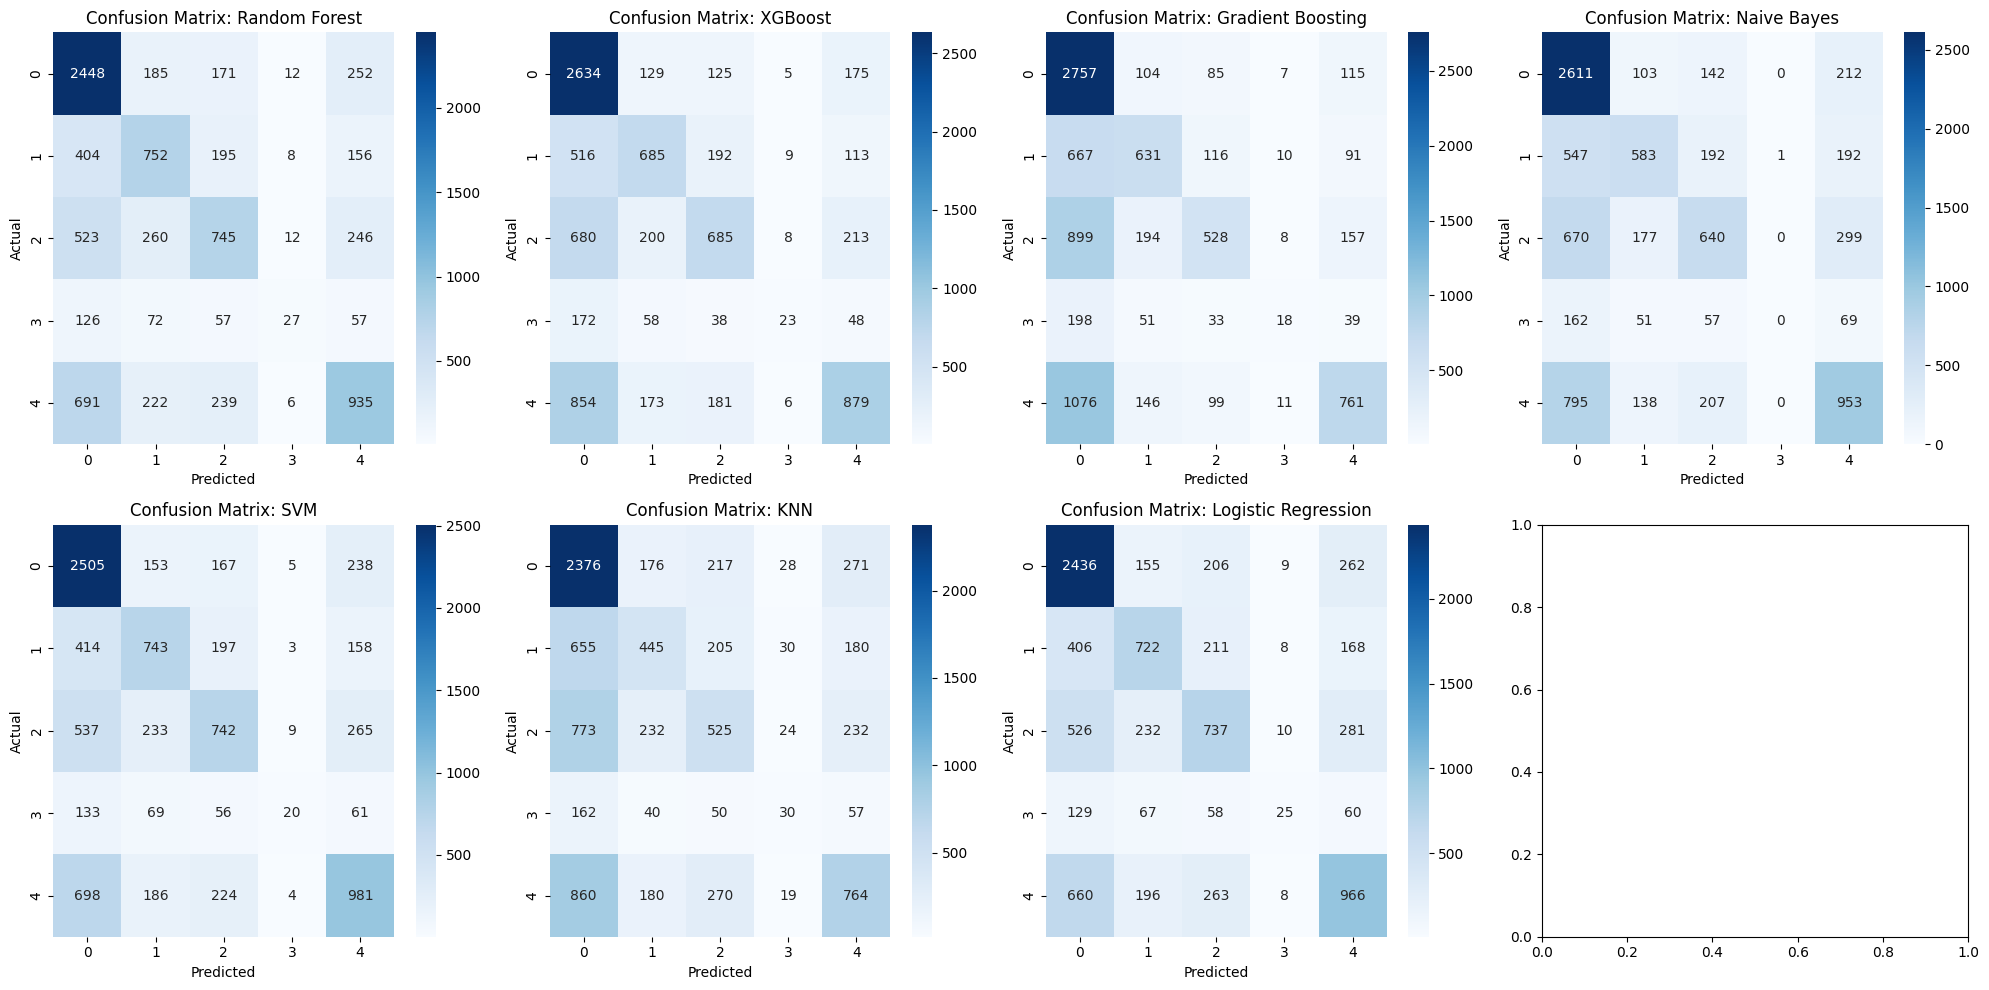

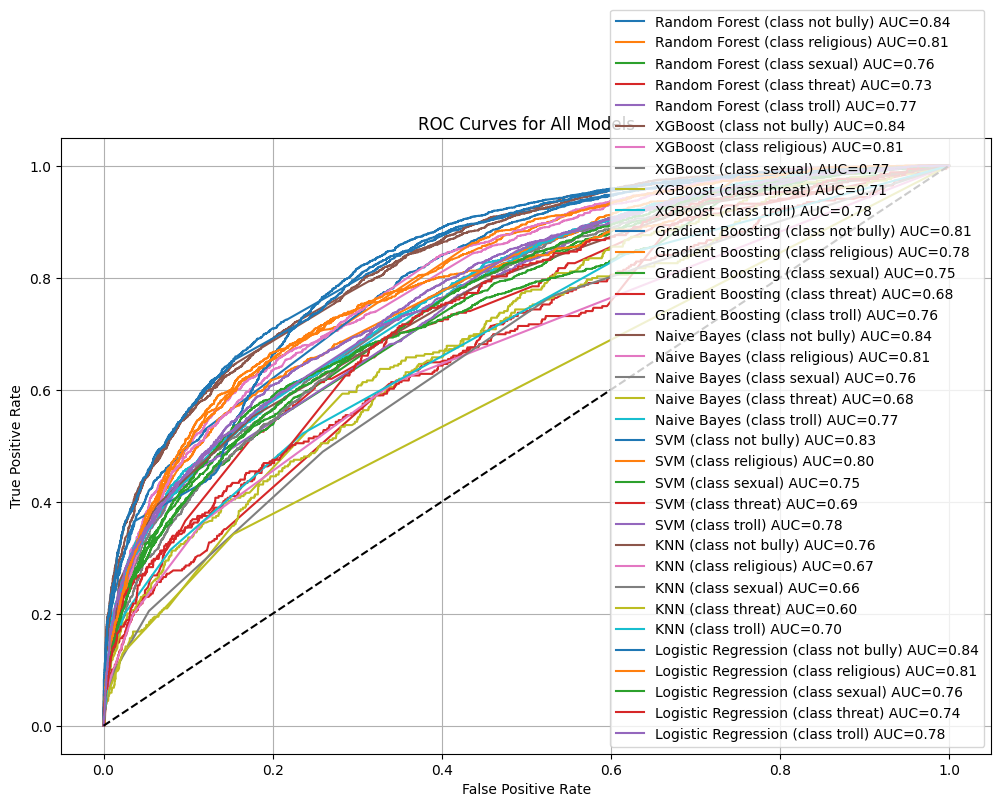

In [21]:
# ===== STEP 8: Plot Confusion Matrices =====
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()
for i, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix: {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
plt.tight_layout()
plt.show()

# ===== STEP 9: Plot ROC Curves =====
plt.figure(figsize=(12, 8))
for name, (fpr, tpr, roc_auc) in roc_curves.items():
    for i in range(len(roc_auc)):
        plt.plot(fpr[i], tpr[i], label=f'{name} (class {label_encoder.classes_[i]}) AUC={roc_auc[i]:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()